In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train_df.csv')
mod_spotify_df = pd.read_csv('mod_spotify_songs.csv')
spotify_df = pd.read_csv('final_spotify_songs.csv')

In [3]:
train_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Mood Label
0,0.830,0.25100,4,-19.774,1,0.0779,0.980,0.893,0.195,0.1640,110.002,184364,ambient
1,0.227,0.00268,3,-27.348,1,0.0600,0.951,0.912,0.109,0.2280,64.260,146000,ambient
2,0.159,0.07100,6,-27.109,0,0.0409,0.911,0.856,0.107,0.0602,146.977,464293,ambient
3,0.150,0.20800,10,-16.901,1,0.0409,0.936,0.755,0.218,0.0759,85.706,322499,ambient
4,0.804,0.32500,2,-13.067,1,0.0469,0.601,0.588,0.601,0.3950,120.002,240250,ambient


In [4]:
mod_spotify_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.565,0.962,8,-2.981,1,0.0640,0.437,0.000000,0.0560,0.906,148.808,160227
1,0.474,0.598,5,-5.023,1,0.0973,0.768,0.000000,0.0841,0.917,184.484,131853
2,0.647,0.582,10,-9.538,0,0.0755,0.410,0.000002,0.0715,0.915,167.396,146480
3,0.688,0.700,7,-6.295,1,0.0757,0.730,0.000000,0.7270,0.876,119.117,142547
4,0.168,0.326,5,-9.981,1,0.0324,0.721,0.000600,0.3160,0.322,174.794,182400


In [5]:
X = X_train = train_df.drop(columns=['Mood Label'])
y = y_test = train_df['Mood Label']

In [6]:
X_train, X_test, y_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [8]:
random_forest_classifier.fit(X_train, y_test)

RandomForestClassifier(random_state=42)

In [9]:
X_predict = mod_spotify_df
predicted_moods_rf = random_forest_classifier.predict(X_predict)
y_pred = random_forest_classifier.predict(X_test)

In [10]:
mod_spotify_df['predicted_mood_rf'] = predicted_moods_rf

In [11]:
spotify_df['predicted_mood_rf'] = mod_spotify_df['predicted_mood_rf']

In [27]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5978260869565217
Precision: 0.5961921538488035
Recall: 0.5978260869565217
F1 Score: 0.5903461632420396


In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 4  2  0  0  0  0  0  0  2  0]
 [ 0 15  0  2  0  0  0  0  2  0]
 [ 0  0  5  0  8  0  1  0  0  4]
 [ 0  0  0 21  0  1  0  0  0  0]
 [ 0  0  2  0 13  0  0  0  0  5]
 [ 0  0  0  2  0 18  0  0  3  0]
 [ 0  0  1  1  0  0  8 11  0  0]
 [ 1  0  1  0  0  0  7  8  0  2]
 [ 1  3  0  2  0  1  0  0 11  0]
 [ 0  0  2  0  6  0  1  0  0  7]]


In [28]:
y_probs = random_forest_classifier.predict_proba(X_test)

In [29]:
roc_curves = {}
auc_scores = {}

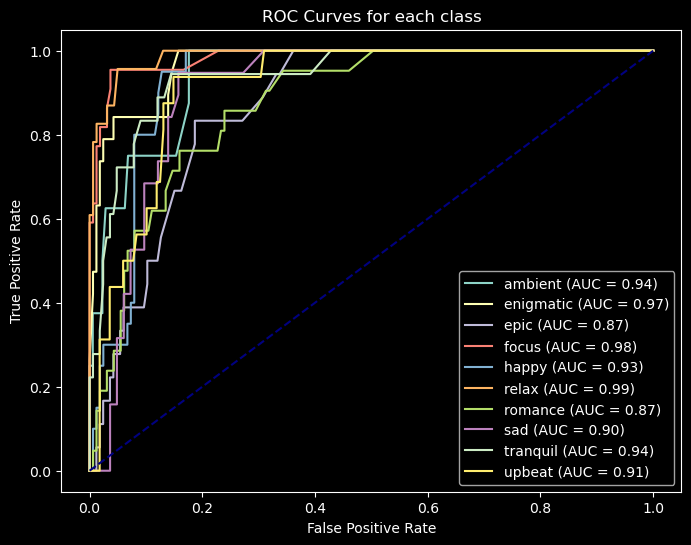

In [35]:
for i in range(len(random_forest_classifier.classes_)):
    fpr, tpr, _ = roc_curve((y_test == random_forest_classifier.classes_[i]).astype(int), y_probs[:, i])
    roc_curves[i] = (fpr, tpr)
    auc_scores[i] = roc_auc_score((y_test == random_forest_classifier.classes_[i]).astype(int), y_probs[:, i])

class_names = random_forest_classifier.classes_

plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for each class')
plt.legend(loc='lower right')
plt.show()

In [32]:
print("AUC Scores for each class:")
for i, auc in auc_scores.items():
    print(f"Class {i}: {auc:.2f}")

AUC Scores for each class:
Class 0: 0.94
Class 1: 0.97
Class 2: 0.87
Class 3: 0.98
Class 4: 0.93
Class 5: 0.99
Class 6: 0.87
Class 7: 0.90
Class 8: 0.94
Class 9: 0.91


In [8]:
spotify_df.to_csv('spotify_data_random-forest-final.csv',index=False)